In [2]:
import rdkit.Chem.AllChem as rdkit
from rdkit.Chem import rdDistGeom
from rdkit.Chem import rdDepictor
from rdkit.Chem import AllChem, TorsionFingerprints
import copy
import stk
import os
import py3Dmol

import pandas as pd
import json
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
import os,time
print( time.asctime())
print(rdBase.rdkitVersion)

Thu Jun 12 14:52:19 2025
2023.09.5


In [3]:
df = pd.read_csv('PubChem_compound_text_Acrylate.csv')
df.head()

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,gpidcnt,gpfamilycnt,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
0,6581,Acrylic acid,ACRYLIC ACID|2-Propenoic acid|79-10-7|prop-2-e...,72.060,C3H4O2,37.3,55.9,0.3,5,1,...,464476,263916,NaN,Biological Test Results|Interactions and Pathw...,18,155|157|161|165|167|175|192|248|256|328|880|11...,20040916,001Chemical|10X CHEM|1st Scientific|3B Scienti...,Chemical Vendors|Curation Efforts|Governmental...,D001697 - Biomedical and Dental Materials > D0...
1,13165,2-Hydroxyethyl acrylate,2-HYDROXYETHYL ACRYLATE|818-61-1|Hydroxyethyl ...,116.110,C5H8O3,46.5,87.7,-0.2,8,1,...,23270,12260,NaN,Biological Test Results|Interactions and Pathw...,17,421|426|427|433|434|435|445|530|540|541|542|54...,20050327,001Chemical|10X CHEM|3B Scientific (Wuhan) Cor...,Chemical Vendors|Curation Efforts|Governmental...,NaN
2,5355130,Octinoxate,Octinoxate|5466-77-3|83834-59-7|2-Ethylhexyl 4...,290.400,C18H26O3,35.5,304.0,5.3,21,0,...,61231,19797,NaN,Biological Test Results|Interactions and Pathw...,17,880|1469|1471|1479|1487|1490|1688|1766|1768|25...,20050326,001Chemical|10X CHEM|3B Scientific (Wuhan) Cor...,Chemical Vendors|Curation Efforts|Governmental...,C1892 - Chemopreventive Agent > C851 - Sunscre...
3,8846,Butyl Acrylate,BUTYL ACRYLATE|141-32-2|n-Butyl acrylate|butyl...,128.169,C7H12O2,26.3,97.1,2.4,9,0,...,161905,68033,NaN,Biological Test Results|Chemical and Physical ...,16,421|426|427|433|434|435|445|530|540|541|542|54...,20040916,001Chemical|10X CHEM|1st Scientific|3B Scienti...,Chemical Vendors|Curation Efforts|Governmental...,NaN
4,8821,Ethyl acrylate,ETHYL ACRYLATE|140-88-5|Acrylic acid ethyl est...,100.120,C5H8O2,26.3,76.1,1.3,7,0,...,43681,22209,NaN,Biological Test Results|Interactions and Pathw...,16,421|426|427|433|434|435|445|530|540|541|542|54...,20050326,10X CHEM|1st Scientific|3B Scientific (Wuhan) ...,Chemical Vendors|Curation Efforts|Governmental...,D009676 - Noxae > D002273 - Carcinogens|D00967...


In [4]:
with open('pubchem_db.txt') as f:
    lines = f.readlines()
    
pubchem_cid = []
pubchem_smiles = []
pubchem_smiles_rep = []
for i in range(len(lines)):
    line = lines[i]
    pubchem_cid.append(line.split()[0])
    
    sm=line.split()[1]
    sm_rep = copy.copy(sm)
    #sm_rep = "[*]CC[*]"+sm_rep[3:]
    pubchem_smiles.append(sm)
    #pubchem_smiles_rep.append(sm_rep)

Name: Acrylic acid
Smiles: C=CC(=O)O


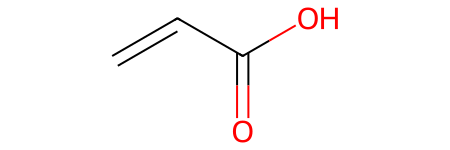

In [5]:
idd = 0
smlA = pubchem_smiles[idd]
nameA = df['cmpdname'][idd]
print('Name: '+nameA)

print('Smiles: '+smlA)
mA = Chem.MolFromSmiles(smlA)
mA

Name: 2-Hydroxyethyl acrylate
Smiles: C=CC(=O)OCCO


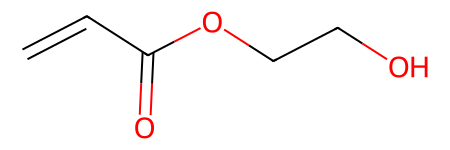

In [11]:
idd = 1
smlB = pubchem_smiles[idd]
nameB = df['cmpdname'][idd]
print('Name: '+nameB)

print('Smiles: '+smlB)
mB = Chem.MolFromSmiles(smlB)
mB

In [12]:

m_h = Chem.AddHs(mA)
params = AllChem.ETKDGv3()
params.useRandomCoords=True
AllChem.EmbedMolecule(m_h, params);
print(m_h.GetNumConformers())

mb_h = Chem.MolToMolBlock(m_h)
p = py3Dmol.view(width=400,height=400)
p.removeAllModels()
p.addModel(mb_h,'sdf')
p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()
p.show()

1


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [13]:
m_h = Chem.AddHs(mB)
params = AllChem.ETKDGv3()
params.useRandomCoords=True
AllChem.EmbedMolecule(m_h, params);
print(m_h.GetNumConformers())

mb_h = Chem.MolToMolBlock(m_h)
p = py3Dmol.view(width=400,height=400)
p.removeAllModels()
p.addModel(mb_h,'sdf')
p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()
p.show()

1


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [14]:
#sml1 = copy.copy(sml)
#sml1 = sml1.replace("Au", "Br")
#sml1 = sml1.replace("Cu", "Br")print(rdkit_polymer.GetNumConformers())
# print(rdkit_polymer.GetConformer().Is3D())

# rdkit_polymer_h = Chem.AddHs(rdkit_polymer)
# params = AllChem.ETKDGv3()
# params.useRandomCoords=True
# params.numThreads = 8
# #params.randomSeed = 0xf00d  # optional random seed for reproducibility
# AllChem.EmbedMolecule(rdkit_polymer_h, params)
# print(rdkit_polymer_h.GetNumConformers())
# rdkit.SanitizeMol(rdkit_polymer_h)
# rdkit.MMFFOptimizeMolecule(rdkit_polymer_h)

# fout = Chem.SDWriter('conformer.mol')
# fout.write(rdkit_polymer_h)
# fout.close()
#sml1='[*]C(C[*])C(=O)O'
#sml1 = 'CCCCCCCCCCCCCCCCCCOC(=O)/C(Br)(CBr)/C1=CC(=C(C=C1)O)O'

sml1 = copy.copy(smlA)
sml1 = sml1.replace("C=C", "[Br]C(Br)")

sml2 = copy.copy(smlB)
sml2 = sml2.replace("C=C", "[Br]C(Br)")
print(sml1, sml2)

[Br]C(Br)C(=O)O [Br]C(Br)C(=O)OCCO


In [15]:
bb1 = stk.BuildingBlock(sml1, [stk.BromoFactory()])
bb2 = stk.BuildingBlock(sml2, [stk.BromoFactory()])
#bb1 = stk.BuildingBlock('NCCCN')

polymer = stk.ConstructedMolecule(
    topology_graph=stk.polymer.Linear(
        building_blocks=(bb1, bb2),
        repeating_unit='AB',
        num_repeating_units=3,
        optimizer=stk.Collapser(scale_steps=False),
    ),
)

# Optimize with the MMFF force field.
rdkit_polymer = polymer.to_rdkit_mol()
rdkit_polymer = AllChem.AddHs(rdkit_polymer)
rdkit.SanitizeMol(rdkit_polymer)
#rdkit.MMFFOptimizeMolecule(rdkit_polymer)

# stk molecules are immutable. with_position_matrix returns a
# a clone, holding the new position matrix.
polymer = polymer.with_position_matrix(
    position_matrix=rdkit_polymer.GetConformer().GetPositions(),
)
rdkit_polymer = polymer.to_rdkit_mol()
rdkit_polymer = AllChem.AddHs(rdkit_polymer)
rdkit.SanitizeMol(rdkit_polymer)

stk.MolWriter().write(polymer, 'polymer.mol')
# Chem.rdmolfiles.MolToPDBFile(rdkit_polymer, 'polymer.pdb')

#polymer_mol = Chem.MolFromMolFile('./polymer.mol')
#imgpol_mol = Draw.MolToImage(rdkit_polymer)
#imgpol_mol.show()

#rdkit_polymer.GetConformers()
# print(rdkit_polymer.GetNumConformers())
# print(rdkit_polymer.GetConformer().Is3D())

rdkit_polymer_h = Chem.AddHs(rdkit_polymer)
params = AllChem.ETKDGv3()
params.useRandomCoords=True
AllChem.EmbedMolecule(rdkit_polymer_h, params);

params = AllChem.ETKDGv3()

rdkit_polymer_h = Chem.MolToMolBlock(rdkit_polymer_h)
p = py3Dmol.view(width=400,height=400)
p.removeAllModels()
p.addModel(rdkit_polymer_h,'sdf')
p.setStyle({'stick':{}})
p.zoomTo()
p.show()
# #params.randomSeed = 0xf00d  # optional random seed for reproducibility
# AllChem.EmbedMolecule(rdkit_polymer_h, params)
# print(rdkit_polymer_h.GetNumConformers())
# rdkit.SanitizeMol(rdkit_polymer_h)
# rdkit.MMFFOptimizeMolecule(rdkit_polymer_h)

# fout = Chem.SDWriter('conformer.mol')
# fout.write(rdkit_polymer_h)
# fout.close()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [18]:
os.system('julia ./example_regular.jl')

Current directory: /home/dosantk/Dropbox/stochastic_analysis_lab/Research/Active_Projects/3M/code_simulation
Input file directory: /home/dosantk/Dropbox/stochastic_analysis_lab/Research/Active_Projects/3M/code_simulation
Output file: /home/dosantk/Dropbox/stochastic_analysis_lab/Research/Active_Projects/3M/code_simulation/box_regular.pdb

################################################################################

 PACKMOL - Packing optimization for the automated generation of
 starting configurations for molecular dynamics simulations.
 
                                                              Version 20.15.0 

################################################################################

  Packmol must be run with: packmol < inputfile.inp 

  Userguide at: http://m3g.iqm.unicamp.br/packmol 

  Reading input file... (Control-C aborts)
  Types of coordinate files specified: pdb
  Seed for random number generator:      1234567
  Output file: box_regular.pdb
  Reading coordi

0

In [19]:
import nglview as nv
view = nv.show_file("./box_regular.pdb")

In [20]:
view

NGLWidget()